## Parametry

In [1]:
SERIES_LENGHT = 72
VALUES_DATATYPE = 'float32'
LEARNING_RATE = 0.00035
EPOCHS = 10
BATCH_SIZE = 16
COMPRESSION = 17

## Wczytanie danych z pliku

In [2]:
import numpy as np

data = np.load("../resources/" + "data_%s_series_%d_compression_%d_minmax.npy" % (VALUES_DATATYPE, SERIES_LENGHT, COMPRESSION))
print(data)
print(data.shape)

[[[0.         0.53610504 0.7925824  ... 0.         0.         0.        ]
  [0.         0.53391683 0.7925824  ... 0.         0.         0.        ]
  [0.         0.5317287  0.78983516 ... 0.         0.         0.        ]
  ...
  [0.07291666 0.5098468  0.77472526 ... 0.         0.         0.        ]
  [0.00520833 0.50328225 0.76785713 ... 0.         0.         0.        ]
  [0.         0.51641136 0.771978   ... 0.         0.         0.        ]]

 [[0.         0.487965   0.7431319  ... 0.         0.         0.        ]
  [0.         0.48358864 0.7431319  ... 0.         0.         0.        ]
  [0.         0.48358864 0.74450547 ... 0.         0.         0.        ]
  ...
  [0.         0.41794312 0.71428573 ... 0.         0.         0.        ]
  [0.03125    0.40700218 0.71016484 ... 0.         0.         0.        ]
  [0.         0.44420132 0.7239011  ... 0.         0.         0.        ]]

 [[0.         0.5010941  0.76373625 ... 0.         0.         0.        ]
  [0.         0.503282

## Wydzielenie zbiorów

In [3]:
from sklearn.model_selection import train_test_split

X = data[:, :SERIES_LENGHT - 1, :]
Y = data[:, SERIES_LENGHT - 1, :]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print("Dane treningowe: "+ str(X_train.shape))

Dane treningowe: (76044, 71, 55)


## Definicja sieci

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import *
from script.main.loss_functions import *
import tensorflow as tf

model = Sequential()
model.add(LSTM(units=55, activation='tanh', return_sequences=True, input_shape=(SERIES_LENGHT - 1,55)))
model.add(LSTM(units=55, activation='tanh'))
model.add(Dense(19))
model.compile(loss=mean_proportional_loss_func, optimizer=Adam(lr=LEARNING_RATE, beta_1=0.9), metrics=['accuracy'])

Using TensorFlow backend.


## Diagram sieci

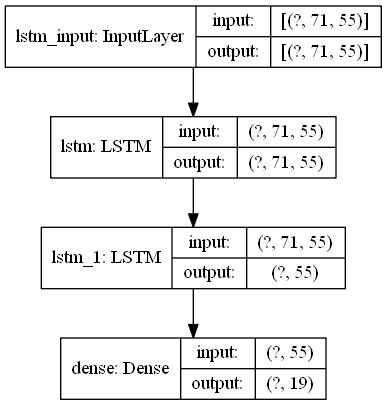

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Uczenie

In [6]:
from script.main.callback.hyperdash_callback import HyperdashCallback
my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='.\logs', histogram_freq=1),
    HyperdashCallback(),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]
 
model.fit(X_train,Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, callbacks=my_callbacks, validation_data=(X_test, Y_test))
  

Train on 76044 samples, validate on 25348 samples
Epoch 1/10
| progress:   0.100000 |
| loss:   0.053767 |
| val_loss:   0.044004 |
76044/76044 - 39s - loss: 0.0538 - accuracy: 0.4539 - val_loss: 0.0440 - val_accuracy: 0.5254
Epoch 2/10
| progress:   0.011951 |
| loss:   0.041816 |
| val_loss:   0.040573 |
76044/76044 - 35s - loss: 0.0418 - accuracy: 0.5268 - val_loss: 0.0406 - val_accuracy: 0.5283
Epoch 3/10
| progress:   0.001829 |
| loss:   0.039987 |
| val_loss:   0.039629 |
76044/76044 - 37s - loss: 0.0400 - accuracy: 0.5277 - val_loss: 0.0396 - val_accuracy: 0.5282
Epoch 4/10
| progress:   0.001212 |
| loss:   0.038776 |
| val_loss:   0.037931 |
76044/76044 - 52s - loss: 0.0388 - accuracy: 0.5341 - val_loss: 0.0379 - val_accuracy: 0.5564
Epoch 5/10
| progress:   0.001699 |
| loss:   0.037077 |
| val_loss:   0.036697 |
76044/76044 - 45s - loss: 0.0371 - accuracy: 0.5709 - val_loss: 0.0367 - val_accuracy: 0.5949
Epoch 6/10
| progress:   0.000901 |
| loss:   0.036175 |
| val_loss:  

## Zapis modelu od pliku

In [7]:
model.save("../resources/trained_model_type2.h5", save_format='tf')

## Zapis danych testowych do pliku

In [8]:
np.save("../resources/test_data/X_test", X_test)
np.save("../resources/test_data/Y_test", Y_test)

###### 